# Convolutional Neural Network

## 1. Construnction of CNN by using keras library

## 1.1 Schematic diagram of the system

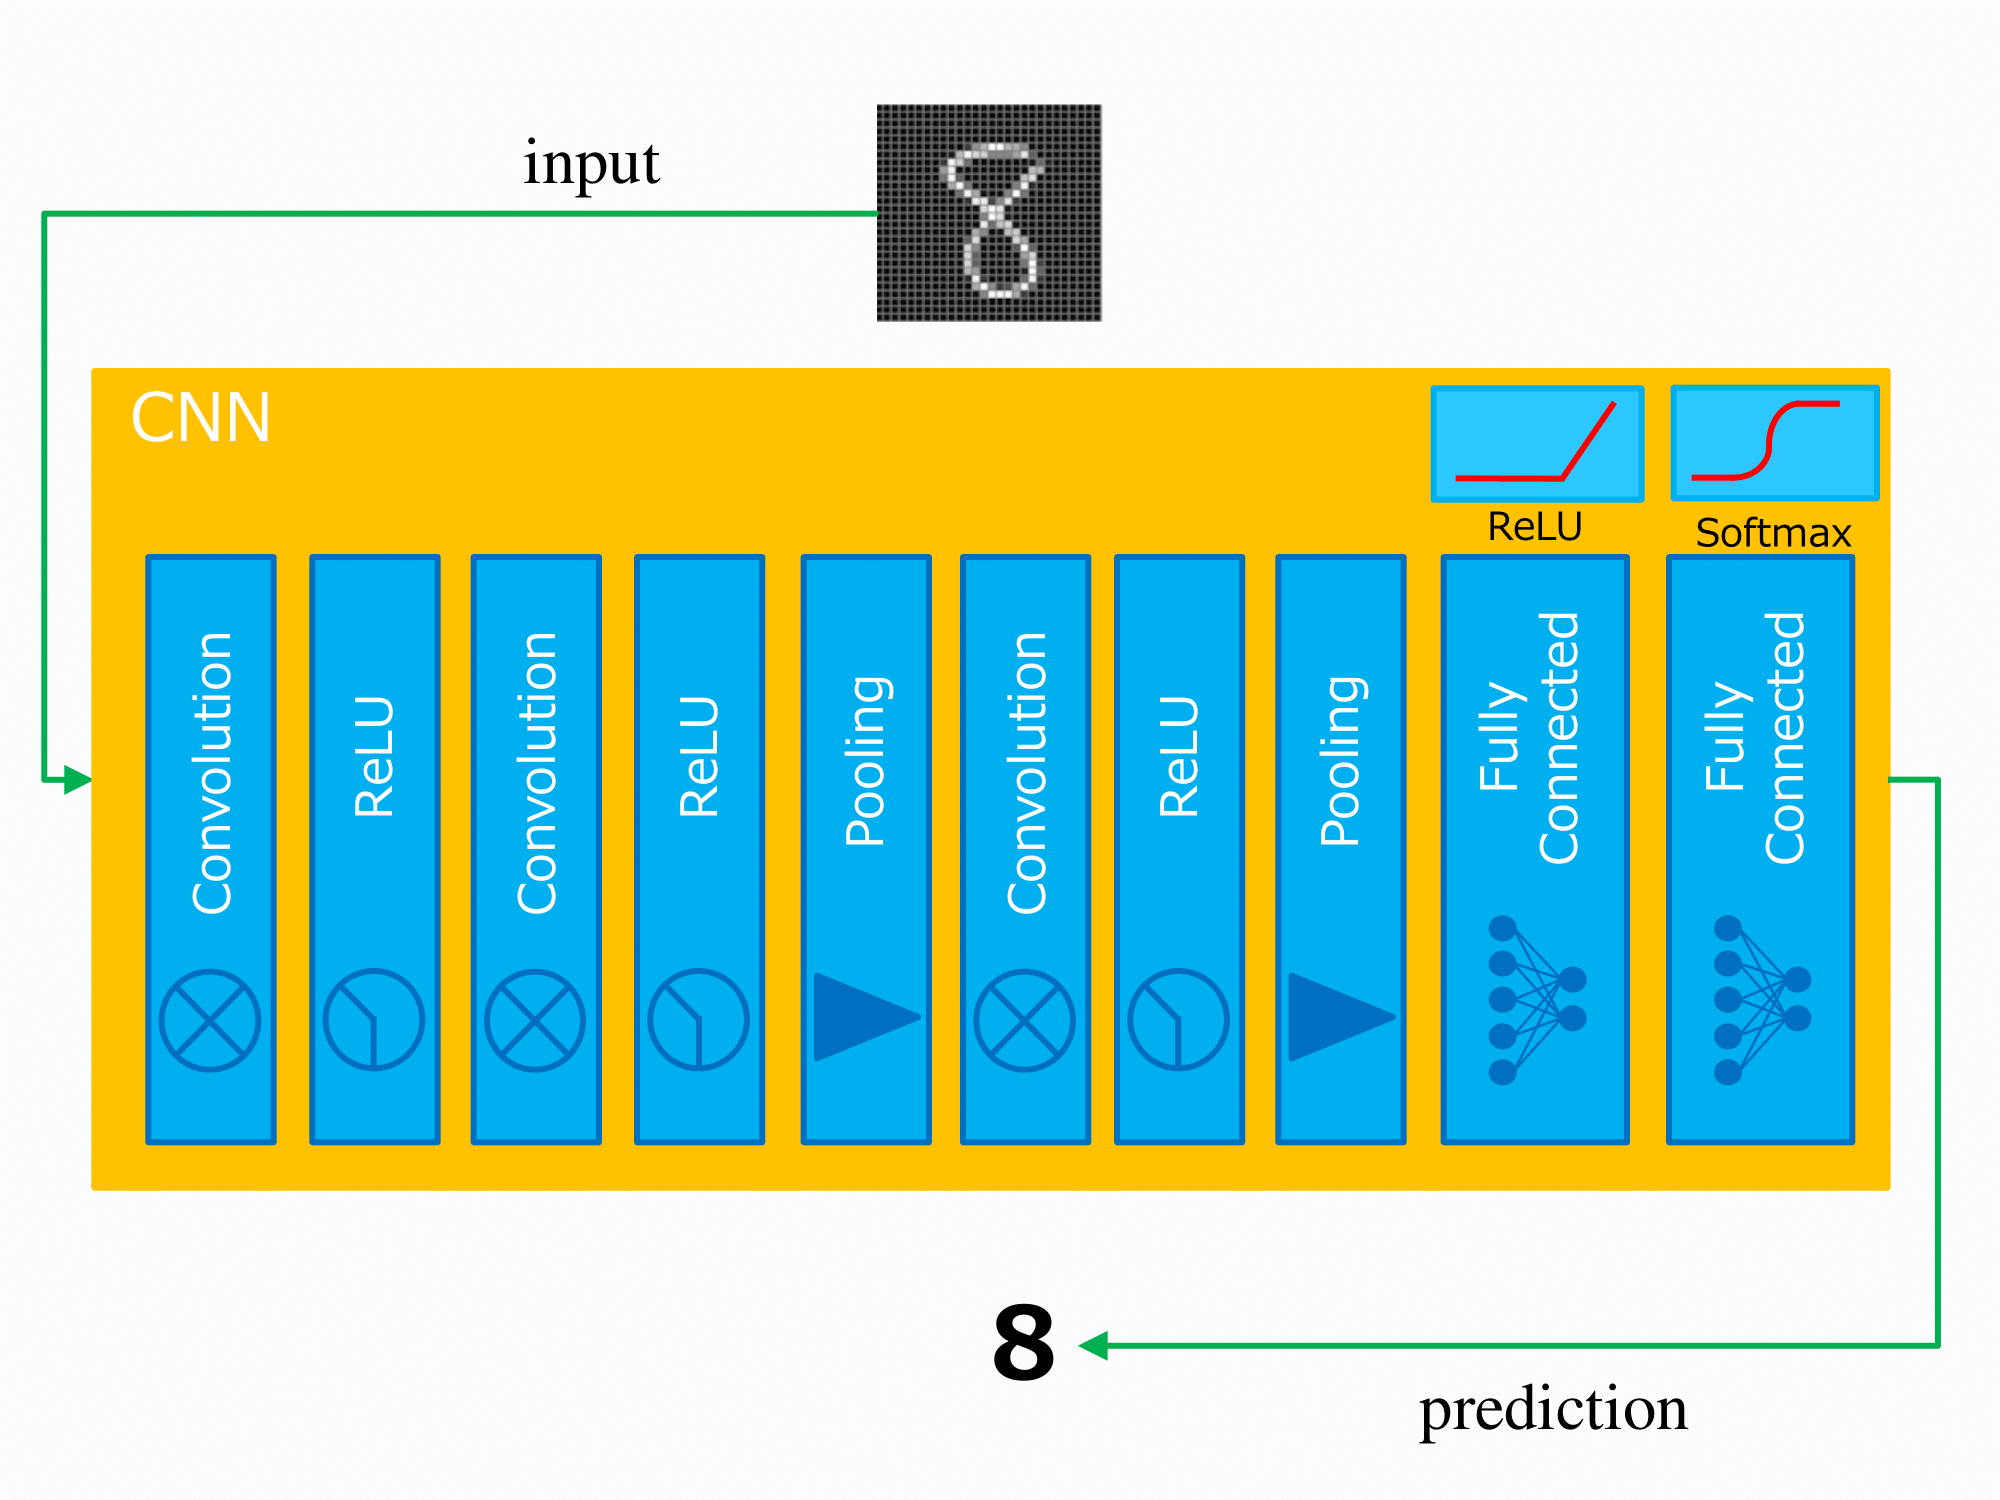

In [1]:
from IPython.display import Image
Image("./../test_keras/archive_data/system.png")

## More detail setting for CNN

1. Optimizer : Stochastic gradient descent method [$\,\eta\,(=0.1)$ denotes learning rate ]
<br><br>
      $$
      \begin{align*}
\boldsymbol{w}^{(\tau +1)}=\boldsymbol{w}^{(\tau)}-\eta\left.\nabla E(\boldsymbol{w})\right|_{\boldsymbol{w}=\boldsymbol{w}^{(\tau)}}
\end{align*}
      $$
  <br>
2. Cost function : Categorical cross entropy
<br><br>
$$
\begin{align*}
E(\boldsymbol{w})=-\sum_{n=1}^N\sum_{k=1}^Kt_{nk}\log y_{nk}
\end{align*}
$$
<br>
In above euation, $t_{nk}$ represents the element of one hot code matrix. Posterior probabilities in multiclass classification is given by
<br><br>
$$
\begin{equation*}
y_{nk}\equiv p\left(\mathcal{C}_k|\boldsymbol{\phi}_n\right)=\sigma_k\left(\boldsymbol{\phi}_n\right)
\end{equation*}
$$
<br>
where $\sigma_k(\cdot)$ is known as soft-max function and given by following equation.
<br><br>
$$
\begin{align*}
\sigma_k\left(\boldsymbol{\phi}_n\right)=\frac{\exp\left(a_{nk}\right)}{\displaystyle \sum_j \exp\left(a_{nj}\right)}\quad a_{nk}=\boldsymbol{w}_k^{\rm T}\boldsymbol{\phi}_n
\end{align*}
$$
<br>
Above equation means that "the $n$-th training data belongs to class $k$".
<br><br>
3. epochs=20, batch size=200, validation split=0.1

## 1.2 Constructing CNN model


 Accuracy rate = 0.9726



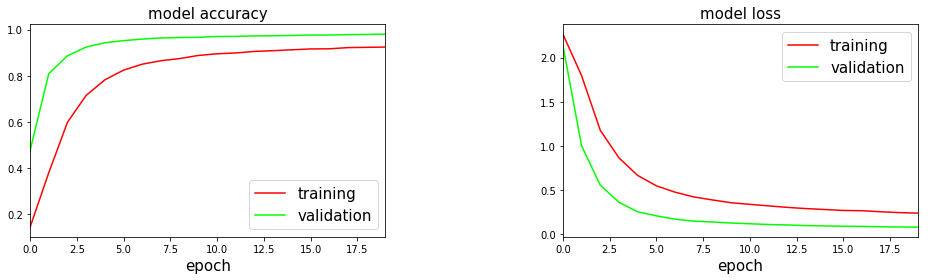

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, Reshape, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Constructing model
model = Sequential()

# input into convolution layer
model.add(Reshape((28,28,1), input_shape=(28,28)))

# convolution layer 1
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))

# convolution layer 2
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))

# Pooling layer 1
model.add(MaxPooling2D((2,2)))
# Dropout layer 1
model.add(Dropout(0.5))

# convolution layer 3
model.add(Conv2D(16,(3,3)))
model.add(Activation("relu"))

# Pooling layer 2
model.add(MaxPooling2D((2,2)))
# Dropout layer 2
model.add(Dropout(0.5))

# convert to single-dimension
model.add(Flatten())

# Fully connected neural network
model.add(Dense(784,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

'''
-------------------
Load MNIST data
-------------------
'''

(X_train, train_t), (X_test, test_t) = mnist.load_data()

X_train = np.array(X_train)/255
X_test = np.array(X_test)/255

# convert to one hot vector
train_t = to_categorical(train_t)
test_t = to_categorical(test_t)

# compile
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# learning train dataset
hist = model.fit(X_train, train_t, batch_size=200, verbose=0,
                 epochs=20, validation_split=0.1)

# evaluation
score = model.evaluate(X_test, test_t, verbose=0)
print("\n Accuracy rate = {0}\n".format(score[1]))

# plot the accuracy and loss
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.plot(hist.history['acc'],color='r',label='training')
ax.plot(hist.history['val_acc'],color='lime',label='validation')
plt.legend(fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.title('model accuracy',fontsize=15)
plt.xlim(0,20-1)
ax = fig.add_subplot(1,2,2)
ax.plot(hist.history['loss'],color='r',label='training')
ax.plot(hist.history['val_loss'],color='lime',label='validation')
plt.legend(fontsize=15)
plt.title('model loss',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.xlim(0,20-1)
plt.tight_layout()
plt.show()

# save model
model.save("./../test_keras/image_recognition/TEST/model_data/cnn_MNIST.h5")

# save MNIST history
import json
with open('./../test_keras/image_recognition/TEST/model_data/cnn_MNIST_hist.json','w') as f:
    json.dump(hist.history, f)

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
__________

## 1.3 Image recogntion with CNN

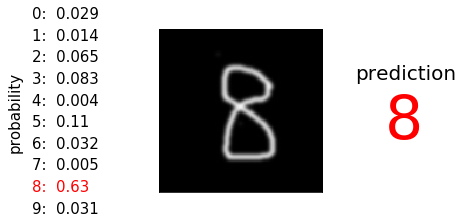

In [4]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt


# input data
read_img = cv2.imread("./../test_keras/image_recognition/image_data/my_data/8.png")

# get the center position
height,width,channel = read_img.shape[:3]
w_center = width//2
h_center = height//2

# trimming
trim_img = read_img[h_center-70:h_center+70, w_center-70:w_center+70]

# BGR -> gray scale
gray = cv2.cvtColor(trim_img, cv2.COLOR_BGR2GRAY)

# gray scale -> binary translation
_, th = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# binary -> black & white inversion
th = cv2.bitwise_not(th)

# blur processing
th = cv2.GaussianBlur(th,(9,9),0)

# save output data
cv2.imwrite("./../test_keras/image_recognition/image_data/binary_data/test.jpg", th)

# reading output data
test_img = cv2.imread("./../test_keras/image_recognition/image_data/binary_data/test.jpg")
image = []
for n in range(3):
    # resize from (140,140) to (28,28) in BGR space
    image.append(cv2.resize(test_img[:,:,n],(28, 28), cv2.INTER_CUBIC))
Xt = np.array(image)/255


'''generate prediction data'''
model = load_model("./../test_keras/image_recognition/TEST/model_data/cnn_MNIST.h5")
result = model.predict_classes(Xt)

#----showing figure------
fig = plt.figure(figsize=(7,3))
ax = fig.add_subplot(111)

# BGR -> RGB translation
im_color = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(im_color)
pos = ax.get_position()
plt.tick_params(labelbottom=False,labelleft=False)
fig.text(0.74,0.65, "prediction",fontsize=20,transform=fig.transFigure)
fig.text(0.8,(pos.y1 - pos.y0) / 2, "{0}".format(result[0]),fontsize=60,color='r')
fig.text(0.05,0.5,"probability",rotation=90, size=15, verticalalignment='center')
pred = model.predict(Xt)[0]
for n in range(len(pred)):
    if n == np.argmax(pred):
        c = 'r'
    else:
        c = 'k'
    fig.text(0.1,0.93 - n * 0.1,
    '{}:  {:.2g}'.format(n,np.round(pred[n],3)),size=15,color=c)
plt.tick_params(length=0)
plt.show()